In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download("punkt")
nltk.download("stopwords")
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [405]:
df = pd.read_csv("../data/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [406]:
df.shape

(1465, 16)

In [407]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [409]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [410]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [411]:
df[df.rating_count.isnull()] # print rows with missing fields

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [412]:
df.dropna(subset=['rating_count'], inplace=True)

In [413]:
# Drop null values
df.dropna(inplace = True)

In [414]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [415]:
df.duplicated().sum()

0

To resolve the issue with the data types of the columns 'actual_price', 'discounted_price', 'discount_percentage', 'rating', and 'rating_count', we will perform the following steps:

Remove the rupee symbol from the 'actual_price' and 'discounted_price' columns.
Remove the % symbol from the 'discount_percentage' column.
Identify the records in the 'rating' column that are causing the incorrect data type.
Remove the punctuation (,) from the 'rating_count' column

In [416]:
df['actual_price'] = df['actual_price'].astype(str).apply(lambda x: x.replace('₹', '').replace(',', '')).astype("float")
df['discounted_price'] = df['discounted_price'].astype(str).apply(lambda x: x.replace('₹', '').replace(',', '')).astype("float")
df['discount_percentage'] = df['discount_percentage'].astype(str).apply(lambda x: x.replace("%", "")).astype(int)

In [417]:
def is_float(num):
  try:
    float(num)
  except:
    return False
  return True

In [418]:
df[~df['rating'].apply(is_float)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [419]:
df.drop(1279, inplace = True)
df['rating'] = df['rating'].astype("float")

In [420]:
df['rating_count'] = df['rating_count'].astype("str").apply(lambda x: x.replace(",", "")).astype("int")

In [421]:
df.shape

(1462, 16)

### EDA & Visualization

In [422]:
df1 = df.copy()

In [423]:
unique_products_count = df1['product_id'].nunique()
average_price = df1['actual_price'].mean()
best_selling_product = df1.loc[df1['rating_count'].idxmax()]
least_selling_product = df1.loc[df1['rating_count'].idxmin()]
top_rated_product = df1.loc[df1['rating'].idxmax()]
lowest_rated_product = df1.loc[df1['rating'].idxmin()]
most_expensive_product = df1.loc[df1['actual_price'].idxmax()]
cheapest_product = df1.loc[df1['actual_price'].idxmin()]
highest_discount_product = df1.loc[df1['discount_percentage'].idxmax()]
avg_rating_count = df1.groupby('product_id')['rating_count'].mean().mean()

df_ans = pd.DataFrame({
    'Question': [
        'Number of Unique Products',
        'Average Price',
        'Best-selling Product',
        'Least-selling Product',
        'Top-rated Product',
        'Lowest-rated Product',
        'Most Expensive Product',
        'Cheapest Product',
        'Highest Discount Product',
        'Average Rating Count for Each Product'
    ],
    'Answer': [
        unique_products_count,
        average_price,
        best_selling_product['product_name'],
        least_selling_product['product_name'],
        top_rated_product['product_name'],
        lowest_rated_product['product_name'],
        most_expensive_product['product_name'],
        cheapest_product['product_name'],
        highest_discount_product['product_name'],
        avg_rating_count
    ],
    'Actual Price': [
        None,
        None,
        best_selling_product['actual_price'],
        least_selling_product['actual_price'],
        top_rated_product['actual_price'],
        lowest_rated_product['actual_price'],
        most_expensive_product['actual_price'],
        cheapest_product['actual_price'],
        highest_discount_product['actual_price'],
        None
    ]
})

df_ans

,Question,Answer,Actual Price
0,Number of Unique Products,1348,NaN
1,Average Price,5453.087743,NaN
2,Best-selling Product,AmazonBasics Flexible Premium HDMI Cable (Blac...,700.0
3,Least-selling Product,Khaitan ORFin Fan heater for Home and kitchen-...,2495.0
4,Top-rated Product,Syncwire LTG to USB Cable for Fast Charging Co...,1999.0
5,Lowest-rated Product,Khaitan ORFin Fan heater for Home and kitchen-...,2495.0
6,Most Expensive Product,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,139900.0
7,Cheapest Product,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,39.0
8,Highest Discount Product,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4999.0
9,Average Rating Count for Each Product,17656.855341,NaN


In [424]:
df['category'][100]

'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls'

In [425]:
# Extraction of main category from the category column.
df1['main_category'] = df1['category'].apply(lambda x: x.split("|")[0])
category_sales = df1.groupby("main_category")['discounted_price'].sum().reset_index()

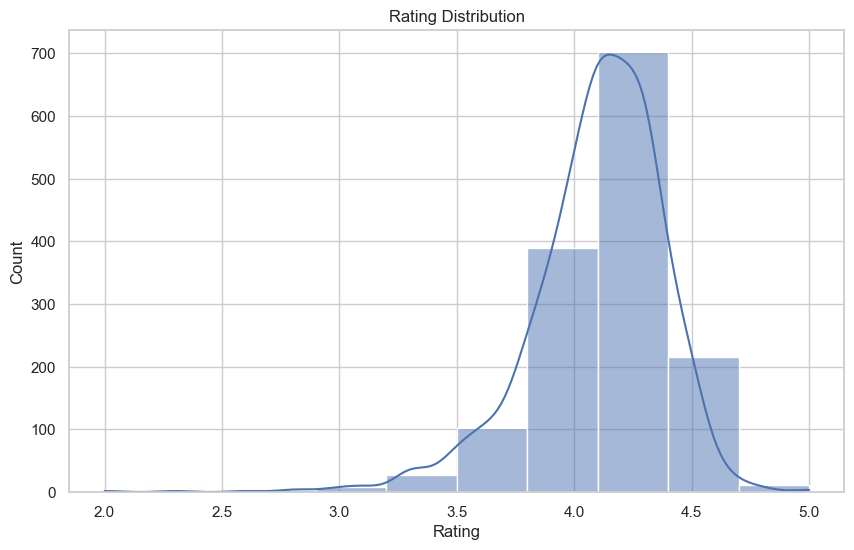

In [426]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

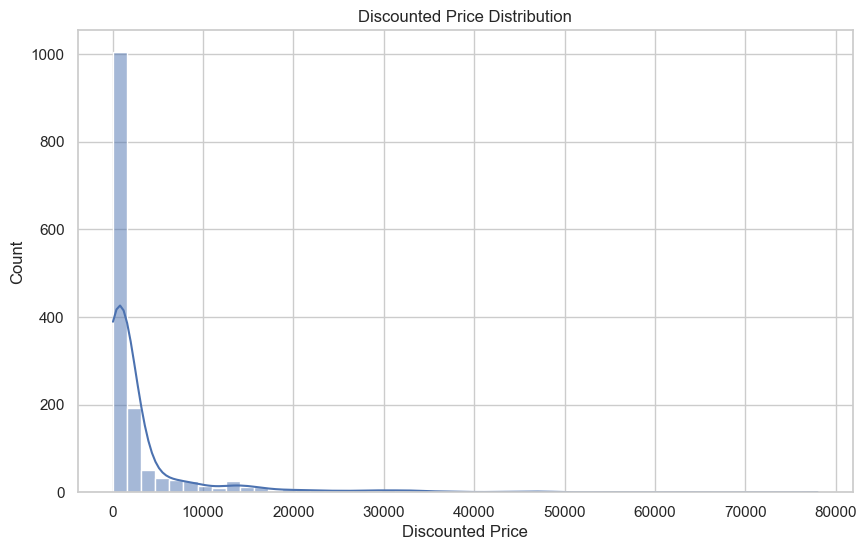

In [427]:
# Visualize the distribution of discounted prices
plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], bins=50, kde=True)
plt.title('Discounted Price Distribution')
plt.xlabel('Discounted Price')
plt.ylabel('Count')
plt.show()

In [428]:
import plotly.express as px
pie_fig = px.pie(category_sales, values = 'discounted_price', names= "main_category", labels = 'main_category', color_discrete_sequence=px.colors.sequential.RdBu,
                 title = "Sales Distibution by category")
pie_fig.update_traces( textposition='inside')

In [429]:
df1['subcategory'] = df1['category'].apply(lambda x: x.split("|")[1])
subcategory_pop = df1.groupby("subcategory")['rating_count'].mean().reset_index()
subcategory_pop = subcategory_pop.sort_values("rating_count", ascending =False)

<Axes: xlabel='rating_count', ylabel='subcategory'>

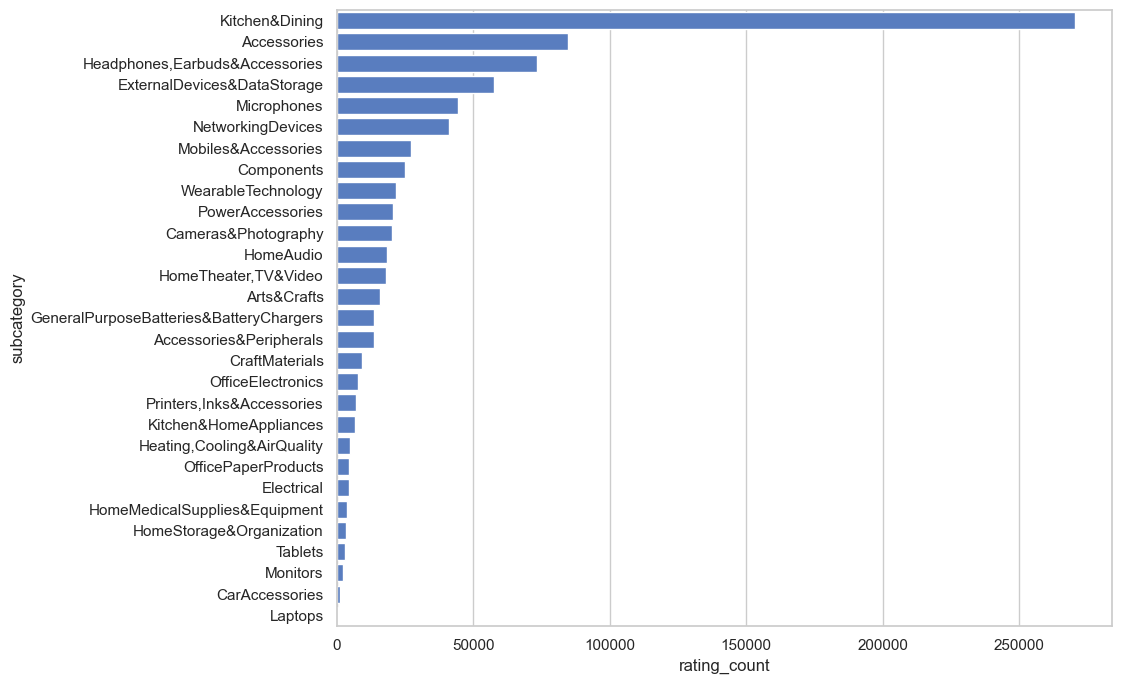

In [430]:
f, ax = plt.subplots(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x="rating_count", y="subcategory", data=subcategory_pop, color="b")

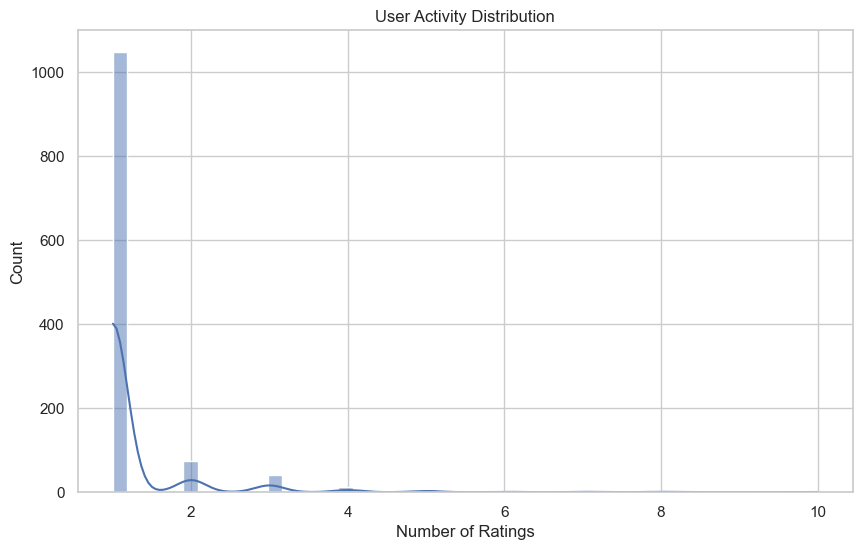

In [431]:
# User activity
user_activity = df.groupby('user_id').size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(user_activity, bins=50, kde=True)
plt.title('User Activity Distribution')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

In [432]:
# Top N products by rating count
top_n_products = df.groupby('product_id')['rating_count'].sum().sort_values(ascending=False).head(10)
print(top_n_products)

product_id
B07KSMBL2H    853945
B014I8SSD0    426973
B014I8SX4Y    426973
B01DEWVZ2C    385177
B07GPXXNNG    363713
B07GQD4K6L    363713
B071Z8M4KX    363711
B09GFPVD9Y    313836
B09GFLXVH9    313836
B09GFPN6TP    313832
Name: rating_count, dtype: int32


### Popularity based recommendation system

In [433]:
# Select the columns useful for popularity based recommendation system
df_popular = df[['product_id', 'product_name', 'category', 'rating', 'rating_count']]

In [434]:
df_popular['category'] = df_popular['category'].apply(lambda x: " ".join(x.split("|")[0:2]))
df_popular['category'] = df_popular['category'].str.lower()

In [435]:
df_popular['weighted_average'] = round(((df['rating'] * df['rating_count']) / df['rating_count'])* (df['rating_count']/1000), 3)

In [436]:
df_popular.groupby("category")
sorted_df = df_popular.sort_values(by = 'weighted_average', ascending = False)
sorted_df = sorted_df.reset_index()
sorted_df = sorted_df[['product_name', 'category', 'weighted_average']]

In [437]:
sorted_df

,product_name,category,weighted_average
0,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","electronics hometheater,tv&video",1878.681
1,AmazonBasics Flexible Premium HDMI Cable (Blac...,"electronics hometheater,tv&video",1878.681
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","electronics hometheater,tv&video",1878.681
3,AmazonBasics Flexible Premium HDMI Cable (Blac...,"electronics hometheater,tv&video",1878.677
4,boAt Bassheads 100 in Ear Wired Earphones with...,"electronics headphones,earbuds&accessories",1491.223
...,...,...,...
1457,"Longway Blaze 2 Rod Quartz Room Heater (White,...","home&kitchen heating,cooling&airquality",0.015
1458,Lifelong LLQH925 Dyno Quartz Heater 2 Power se...,"home&kitchen heating,cooling&airquality",0.015
1459,VAPJA® Portable Mini Juicer Cup Blender USB Re...,home&kitchen kitchen&homeappliances,0.014
1460,NGI Store 2 Pieces Pet Hair Removers for Your ...,home&kitchen kitchen&homeappliances,0.006


In [438]:
print(df.corr(numeric_only=True))

                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961910            -0.242298   
actual_price                 0.961910      1.000000            -0.117855   
discount_percentage         -0.242298     -0.117855             1.000000   
rating                       0.121132      0.122467            -0.155679   
rating_count                -0.027304     -0.036215             0.011294   

                       rating  rating_count  
discounted_price     0.121132     -0.027304  
actual_price         0.122467     -0.036215  
discount_percentage -0.155679      0.011294  
rating               1.000000      0.102235  
rating_count         0.102235      1.000000  


In [439]:
def popular_recommendation(text):
    mask = sorted_df['category'].str.split()

    product_list = []
    for i in range(len(mask)):
        if text in mask[i]:
            product_list.append(sorted_df.iloc[i]['product_name'])
    return product_list

    return "No product found with the specified category."

In [440]:
product = popular_recommendation("home&kitchen")
for i in product[0:5]:
  print(i)

Pigeon Polypropylene Mini Handy and Compact Chopper with 3 Blades for Effortlessly Chopping Vegetables and Fruits for Your Kitchen (12420, Green, 400 ml)
Pigeon by Stovekraft Amaze Plus Electric Kettle (14289) with Stainless Steel Body, 1.5 litre, used for boiling Water, making tea and coffee, instant noodles, soup etc. 1500 Watt (Silver)
Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))
Prestige Electric Kettle PKOSS - 1500watts, Steel (1.5Ltr), Black
Pigeon by Stovekraft Cruise 1800 watt Induction Cooktop (Black)


### Content Based Recommendation System

In [441]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [442]:
df_content = df[[ 'product_name','category', 'about_product', 'product_id', 'review_content', 'rating']]

In [443]:
df_content['product_search_name'] = df_content['category'].apply(lambda x:(x.split("|")[-1]))
df_content['category'] = df_content['category'].apply(lambda x: " ".join(x.split("|")[0:2]))

In [444]:
print(f"Original string present in the category column is:\n {df['category'][0]}")
print("-" *20)
print(f" The extracted category is:\n {df_content['category'][0]}")
print("-" *20)
print(f"The extracted product search name is:\n {df_content['product_search_name'][0]}")

Original string present in the category column is:
 Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
--------------------
 The extracted category is:
 Computers&Accessories Accessories&Peripherals
--------------------
The extracted product search name is:
 USBCables


In [445]:
df_content['product_search_name'] = df_content['product_search_name'].str.lower()

In [446]:
df_content['description'] = df_content['category'] + df_content['about_product'] + df_content['review_content'] + df_content['product_name']

In [447]:
df_content.sample(5)

,product_name,category,about_product,product_id,review_content,rating,product_search_name,description
1083,Butterfly EKN 1.5-Litre Electric Kettle (Silve...,Home&Kitchen Kitchen&HomeAppliances,"Filter Type : Spout|Auto cut off facility, Dry...",B078V8R9BS,I bought this item about one year ago. Still ...,4.2,kettle&toastersets,Home&Kitchen Kitchen&HomeAppliancesFilter Type...
699,MI Braided USB Type-C Cable for Charging Adapt...,Computers&Accessories Accessories&Peripherals,1M Long Cable. Usb 2.0 (Type A)|Braided Usb Ty...,B083342NKJ,"I like it 👍👍,Best charging power . I used this...",4.4,usbcables,Computers&Accessories Accessories&Peripherals1...
1194,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen Kitchen&HomeAppliances,The battery operated milk frother is easy to c...,B0BPCJM7TB,This is my first coffee frother and I just lov...,4.0,handblenders,Home&Kitchen Kitchen&HomeAppliancesThe battery...
91,OnePlus 108 cm (43 inches) Y Series Full HD Sm...,"Electronics HomeTheater,TV&Video",Resolution : Full HD (1920x1080) | Refresh Rat...,B09Q5P2MT3,This OnePlus TV is great if you want a afforda...,4.2,smarttelevisions,"Electronics HomeTheater,TV&VideoResolution : F..."
281,Lenovo USB A to Type-C Tangle-free Aramid fib...,Computers&Accessories Accessories&Peripherals,Accessibility meets universal compatibility: E...,B09PTT8DZF,"Go for it without any hesitation,Even after se...",3.9,usbcables,Computers&Accessories Accessories&PeripheralsA...


In [448]:
df_content['description'][5]

"Computers&Accessories Accessories&PeripheralsFast Charging & Data Sync: Solero TB301 Type-C cable supports fast charge up to 5V/3A for devices and data syncing speed up to 480Mbps.|Universal Compatibility: This USB charging cable connects USB Type-C devices with standard USB devices like laptops, hard drives, power banks, wall and car chargers, etc..Connector One: Reversible Type C|Connector Two: USB A Type|Rough & Tough Type-C Cable: Charging cable with a double-braided exterior, premium aramid fiber core and metal plugs. It has passed 10,000 bending tests and can easily withstand daily use.|Extended Length: 1.5-meter long c-type cable uses nylon material to protect the wire and avoid knots.|Perfect Fit Connectors: pTron Soler USB-C has passed the 5KG load test, swing test, 5000+ times connect & disconnect to ensure that there are no loose connections.It's a good product.,Like,Very good item strong and useful USB cableValue for moneyThanks to amazon and producer,https://m.media-amazo

In [449]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download("punkt")
nltk.download("stopwords")
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [450]:
# Covert to lower case
df_content['description'] = df_content['description'].str.lower()

In [451]:
ps = PorterStemmer()
def stem(text):
  y = []
  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y)

In [452]:
df_content['description'] = df_content['description'].apply(stem)

In [453]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

df_content['description'] = df_content['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_content['description']).toarray()

In [454]:
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(1462, 19481)

In [455]:
tfidf_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07863608, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [456]:
similarity = cosine_similarity(tfidf_matrix)

In [457]:
similarity

array([[1.        , 0.16640727, 0.34239226, ..., 0.05082321, 0.07126404,
        0.00912948],
       [0.16640727, 1.        , 0.15050626, ..., 0.02997054, 0.0373962 ,
        0.03757223],
       [0.34239226, 0.15050626, 1.        , ..., 0.04104274, 0.11182916,
        0.00964146],
       ...,
       [0.05082321, 0.02997054, 0.04104274, ..., 1.        , 0.10548395,
        0.04300779],
       [0.07126404, 0.0373962 , 0.11182916, ..., 0.10548395, 1.        ,
        0.02950112],
       [0.00912948, 0.03757223, 0.00964146, ..., 0.04300779, 0.02950112,
        1.        ]])

In [458]:
sorted(list(enumerate(similarity[0])), reverse = True, key = lambda x: x[1])[:5]

[(0, 1.0000000000000002),
 (612, 0.9950315470362184),
 (367, 0.9947754282113126),
 (220, 0.9368563555642074),
 (42, 0.9270395192388299)]

In [459]:
def recommend(name):
  product_index = df_content[df_content['product_search_name'] == name].index[0]
  distances = similarity[product_index]
  product_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x: x[1])[1:6]

  for i in product_list:
    print (df_content.iloc[i[0]]['product_name'])

In [460]:
df_content[df_content['product_search_name'] == 'bluetoothspeakers'].index[0]

671

In [461]:
recommend("bluetoothspeakers")

Portronics Konnect L POR-1081 Fast Charging 3A Type-C Cable 1.2Meter with Charge & Sync Function for All Type-C Devices (Grey)
Portronics Konnect L POR-1081 Fast Charging 3A Type-C Cable 1.2Meter with Charge & Sync Function for All Type-C Devices (Grey)
Portronics Konnect L 1.2M POR-1401 Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function (White)
Portronics Konnect L 1.2M POR-1401 Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function (White)
Portronics Konnect L 1.2M POR-1401 Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function (White)


In [462]:
recommend('usbcables')

Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)
Wayona Nylon Braided Usb Syncing And Charging Cable Sync And Charging Cable For Iphone, Ipad (3 Ft, Black) - Pack Of 2
Wayona Nylon Braided 3A Lightning to USB A Syncing and Fast Charging Data Cable for iPhone, Ipad (3 FT Pack of 1, Black)
Wayona Nylon Braided (2 Pack) Lightning Fast Usb Data Cable Fast Charger Cord For Iphone, Ipad Tablet (3 Ft Pack Of 2, Grey)


### Collaborative Filtering

In [463]:
df_collab = df[['category', 'product_name', 'rating' ,'user_id']]

In [464]:
df_collab.columns

Index(['category', 'product_name', 'rating', 'user_id'], dtype='object')

In [465]:
df_collab['product_search_name'] = df_collab['category'].apply(lambda x:(x.split("|")[-1]))
df_collab['category'] = df_collab['category'].apply(lambda x: " ".join(x.split("|")[0:2]))

In [466]:
df_collab['product_search_name'] = df_collab['product_search_name'].str.lower()

In [467]:
df_collab['user_id'][0]

'AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ'

In [468]:
import hashlib
# Function to hash and truncate user IDs
def shorten_user_id(user_id, length=8):
    return hashlib.sha256(user_id.encode()).hexdigest()[:length]

In [469]:
df_collab['shorten_user_id'] = df_collab['user_id'].apply(shorten_user_id)
df_collab.drop('user_id', axis =1, inplace = True)

In [470]:
df_collab.head()

,category,product_name,rating,product_search_name,shorten_user_id
0,Computers&Accessories Accessories&Peripherals,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,usbcables,ad1c6cbe
1,Computers&Accessories Accessories&Peripherals,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,usbcables,904356c2
2,Computers&Accessories Accessories&Peripherals,Sounce Fast Phone Charging Cable & Data Sync U...,3.9,usbcables,014bd615
3,Computers&Accessories Accessories&Peripherals,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,4.2,usbcables,cda7df4b
4,Computers&Accessories Accessories&Peripherals,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,4.2,usbcables,65796294


In [471]:
pivot = df_collab.pivot_table(index ='product_search_name', columns = 'shorten_user_id', values = "rating")
pivot

shorten_user_id,000669f9,002aadea,0043cbfa,00b9ad9d,00d2a33e,00fedf14,014bd615,019594a9,01c96e41,01d4f94c,...,fe1b2d42,fe423d5e,fe4416f1,fe830311,fed3427c,fef4198a,ff4107e5,ff41797f,ff62bd94,ff7d1797
product_search_name,,,,,,,,,,,,,,,,,,,,,
3dglasses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adapters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adapters&multi-outlets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airfryers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airpurifiers&ionizers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wetgrinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wireboundnotebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wirelessusbadapters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [472]:
pivot.fillna(0,inplace = True)
pivot

shorten_user_id,000669f9,002aadea,0043cbfa,00b9ad9d,00d2a33e,00fedf14,014bd615,019594a9,01c96e41,01d4f94c,...,fe1b2d42,fe423d5e,fe4416f1,fe830311,fed3427c,fef4198a,ff4107e5,ff41797f,ff62bd94,ff7d1797
product_search_name,,,,,,,,,,,,,,,,,,,,,
3dglasses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adapters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adapters&multi-outlets,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
airfryers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
airpurifiers&ionizers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wetgrinders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wireboundnotebooks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wirelessusbadapters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [473]:
pivot.shape

(207, 1191)

In [474]:
similarity_score = cosine_similarity(pivot)

In [475]:
similarity_score.shape

(207, 207)

In [476]:
def recommend_collab(product_name):
  index = np.where(pivot.index == 'smartwatches')[0][0]
  similar_items = sorted(list(enumerate(similarity_score[index])), key = lambda x: x[1], reverse = True)[1:6]

  for i in similar_items:
    print(pivot.index[i[0]])

In [477]:
recommend_collab('wetgrinders')

3dglasses
adapters
adapters&multi-outlets
airfryers
airpurifiers&ionizers


In [479]:
def hybrid_recommendation(product_name, top_n=5):
    # Get recommendations from each model
    popular_products = popular_recommendation(product_name)
    content_based_recommendations = recommend(product_name)
    collaborative_based_recommendations = recommend_collab(product_name)

    # Ensure all recommendations are lists
    if not popular_products:
        popular_products = []
    if not content_based_recommendations:
        content_based_recommendations = []
    if not collaborative_based_recommendations:
        collaborative_based_recommendations = []

    # Combine all recommendations and remove duplicates
    combined_recommendations = list(set(popular_products + content_based_recommendations + collaborative_based_recommendations))

    # Print recommendations in a readable format
    print("Recommended Products:")
    for idx, recommendation in enumerate(combined_recommendations[:top_n], 1):
        print(f"{idx}. {recommendation}")

# Test the hybrid recommendation system
hybrid_recommendation("bluetoothspeakers")


Portronics Konnect L POR-1081 Fast Charging 3A Type-C Cable 1.2Meter with Charge & Sync Function for All Type-C Devices (Grey)
Portronics Konnect L POR-1081 Fast Charging 3A Type-C Cable 1.2Meter with Charge & Sync Function for All Type-C Devices (Grey)
Portronics Konnect L 1.2M POR-1401 Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function (White)
Portronics Konnect L 1.2M POR-1401 Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function (White)
Portronics Konnect L 1.2M POR-1401 Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function (White)
3dglasses
adapters
adapters&multi-outlets
airfryers
airpurifiers&ionizers
Recommended Products:


In [483]:
# Save the popularity-based model DataFrame
with open('../models/popularity_based_model.pkl', 'wb') as f:
    pickle.dump(sorted_df, f)

In [484]:
# for content based model 

# Save the TF-IDF Vectorizer
with open('../models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the similarity matrix
similarity = cosine_similarity(tfidf_matrix)
with open('../models/content_similarity_matrix.pkl', 'wb') as f:
    pickle.dump(similarity, f)

In [485]:
# Save the collaborative-based model DataFrame
with open('../models/collaborative_based_pivot.pkl', 'wb') as f:
    pickle.dump(pivot, f)

In [486]:
# Save the similarity score matrix
with open('../models/collaborative_similarity_score.pkl', 'wb') as f:
    pickle.dump(similarity_score, f)

print("Models saved successfully.")

Models saved successfully.
